In [96]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
####Reading Training Data
f = gzip.open('D:/Studies/DL/HW/Dcode/MNIST_data/train-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 20000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_data = data.reshape(num_images, image_size, image_size, 1)
train_data = data.reshape(num_images,image_size*image_size)

f = gzip.open('D:/Studies/DL/HW/Dcode/MNIST_data/train-labels-idx1-ubyte.gz','r')
image_size = 28
num_images = 20000

f.read(8)
buf = f.read(num_images)
labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
train_labels = labels.reshape(num_images,1)

In [5]:
####Reading Testing Data
f = gzip.open('D:/Studies/DL/HW/Dcode/MNIST_data/t10k-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 2000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = data.reshape(num_images, image_size, image_size, 1)
test_data = data.reshape(num_images,image_size*image_size)

f = gzip.open('D:/Studies/DL/HW/Dcode/MNIST_data/t10k-labels-idx1-ubyte.gz','r')
image_size = 28
num_images = 2000

f.read(8)
buf = f.read(num_images)
labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
test_labels = labels.reshape(num_images,1)

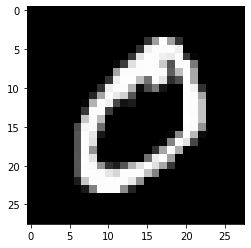

In [187]:
img = train_data[1].reshape(28,28).astype(np.uint8)
plt.imshow(img, cmap='gray')
plt.show()

In [7]:
###Adding bias value to training and testing data
input_train_data = np.insert(train_data,0,1,axis=1)
input_train_data.shape

input_test_data = np.insert(test_data,0,1,axis=1)
input_test_data.shape

(2000, 785)

In [9]:
####Perceptron
def train_percep(X,y,eta,num_epochs):
    num_feat = X.shape[1]
    num_samples = X.shape[0]
    w = np.zeros(num_feat)
    #up_wt = np.zeros(num_feat)
    y_pred_all  = -1*np.ones(num_samples)
    errors_all = np.ones(num_samples)
    acc_all = []
    cost_all = []
    
    for epoch in range(num_epochs):
        out = np.dot(X,w)
        for i in range(out.shape[0]):
            if (out[i]>0):
                y_pred_all[i]=1
            else:
                y_pred_all[i]=-1

        err = y - y_pred_all
        up_wt = eta*np.dot(err,X)
        w = w + up_wt

        acc = np.count_nonzero(err)/num_samples
        acc_all.append(1-acc)
        errors_all = (err)**2
        cost_all.append(0.5*np.sum(errors_all))
    
    return cost_all,w,acc_all

def sigmoid (x):
    return 1/(1 + np.exp(-x))
def derivatives_sigmoid(x):
    return x * (1 - x)

def predict_per_all(X,y,w_all):
    num_samples = X.shape[0]
    #y_pred_all = np.zeros(num_samples)
    out_all = np.dot(X,w_all.T)
    y_pred = np.argmax(out_all, axis=1)
    err = np.count_nonzero(y.ravel()-y_pred)
    acc = err/num_samples
    return 1-acc,y_pred,err

def predict_per(X,y,w):
    num_samples = X.shape[0]
    y_pred_all = -1*np.ones(num_samples)
    out = np.dot(X,w)
    idx = np.where(out>=0)
    y_pred_all[idx] = 1
    err = np.count_nonzero(y-y_pred_all)
    acc = err/num_samples
    return y_pred_all,1-acc

In [216]:
num_samples = X_train.shape[0]
X_train = input_train_data
X_test = input_test_data
idx = np.where(train_labels == 7)[0]
y_train = -1 * np.ones(num_samples)
y_train[idx] = 1

idx = np.where(test_labels == 0)[0]
y_test = -1 * np.ones(input_test_data.shape[0])
y_test[idx] = 1

In [218]:
eta = 0.001
epochs = 15
cost1,w1,ac1= train_percep(X_train,y_train,eta,epochs)
print(cost1,ac1)

[4186.0, 35814.0, 4186.0, 4186.0, 4186.0, 4186.0, 4186.0, 3196.0, 1526.0, 1166.0, 1130.0, 1140.0, 1148.0, 1138.0, 1122.0] [0.89535, 0.10465000000000002, 0.89535, 0.89535, 0.89535, 0.89535, 0.89535, 0.9201, 0.96185, 0.97085, 0.97175, 0.9715, 0.9713, 0.97155, 0.97195]


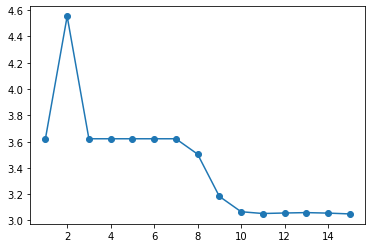

In [219]:
plt.plot(range(1, len(cost1)+1), np.log10(cost1), marker='o')

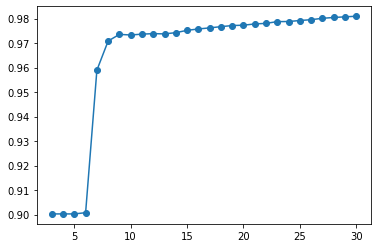

In [95]:
plt.plot(range(3, len(ac1)+1), ac1[2:], marker='o')

In [99]:
#####Training the perceptrons
eta = 0.001
epochs = 15
num_samples = input_train_data.shape[0]
X_train = input_train_data
X_test = input_test_data
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)
cost_per_class = []
acc_per_class= []
w_all = []
for i in range(10):
    idx = np.where(train_labels == i)[0]
    y_train = -1 * np.ones(num_samples)
    y_train[idx] = 1

    idx = np.where(test_labels == i)[0]
    y_test = -1 * np.ones(input_test_data.shape[0])
    y_test[idx] = 1
    cost,w,_= train_percep(X_train,y_train,eta,epochs)
    _,acc = predict_per(X_test,y_test,w)
    
    cost_per_class.append(cost)
    acc_per_class.append(acc)
    w_all.append(w)
    

In [100]:
####Testing and Results
####accuracy per class for 10 2-way classifiers
print("Accuracy of 10 2-way classifiers")
print(acc_per_class)
####Overall accuracy 
print("Overall accuracy")
w_all = np.array(w_all)
acc_all,y_pred_all,err_all = predict_per_all(X_test,test_labels,w_all)
print(acc_all)

Accuracy of 10 2-way classifiers
[0.9715, 0.9825, 0.957, 0.952, 0.9525, 0.921, 0.9625, 0.9575, 0.8045, 0.8575]
Overall accuracy
0.794


In [220]:
####Logistic Regression
def log_reg_train(X,y,eta,epochs):
    num_feat = X.shape[1]
    num_samples = X.shape[0]
    m = num_feat
    w = np.zeros(num_feat)
    #up_wt = np.zeros(num_feat)
    y_pred_all  = -1*np.ones(num_samples)
    errors_all = np.ones(num_samples)
    acc_all = []
    cost_all = []
    
    for epoch in range(epochs):
        out = np.dot(X,w)
        ##activation
        A = sigmoid(out)
        
        cost = (-1* (np.sum((y*np.log(A)) + (1-y)*np.log(1-A)))/m)
        #cost = (1 / float(2*m)) * np.sum((A -y)**2)
        dY_hat = A - y
        dA = dY_hat * sigmoid(A)*(1-sigmoid(A))
        
        up_wt = (1/float(m)) * np.dot(X.T,dA.T)
        w = w - eta*up_wt
        
        cost_all.append(cost)
        #acc = np.count_nonzero(err)/num_samples
        #acc_all.append(1-acc)
    
    return cost_all,w

def log_reg_predict(X,y,w):
    num_samples = y.shape[0]
    y_pred = np.zeros(num_samples)
    A = sigmoid(np.dot(X,w))
    for i in range(num_samples):
        if (A[i]>0.5):
            y_pred[i] = 1
        else:
            y_pred[i] = -1
    acc = np.count_nonzero(y - y_pred)/num_samples
    return 1-acc

def log_reg_predict_all(X,y,w_all):
    num_samples = X.shape[0]
    #y_pred_all = np.zeros(num_samples)
    out_all = np.dot(X,w_all.T)
    y_pred = np.argmax(out_all, axis=1)
    err = np.count_nonzero(y.ravel()-y_pred)
    acc = err/num_samples
    return 1-acc,y_pred,err

In [221]:
num_samples = X_train.shape[0]
X_train = input_train_data
X_test = input_test_data
idx = np.where(train_labels == 0)[0]
y_train = -1 * np.ones(num_samples)
y_train[idx] = 1

idx = np.where(test_labels == 0)[0]
y_test = -1 * np.ones(input_test_data.shape[0])
y_test[idx] = 1

In [222]:
eta = 0.001
epochs =10
cost,w = log_reg_train(X_train,y_train,eta,epochs)
print(cost)

d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


[26.122292993630573, 12.738853503184712, 12.738853503184712, 12.738853503184712, 12.738853503184712, 12.738853503184712, 12.738853503184712, 12.738853503184712, 12.738853503184712, 12.738853503184712]


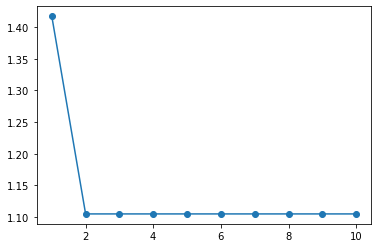

In [223]:
plt.plot(range(1, len(cost)+1), np.log10(cost), marker='o')

In [202]:
log_reg_predict(X_test,y_test,w)

d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


0.9125

In [203]:
#####Training the perceptrons for LR
eta = 0.001
epochs = 15
num_samples = input_train_data.shape[0]
X_train = input_train_data
X_test = input_test_data
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)
cost_per_class = []
acc_per_class= []
w_all = []
for i in range(10):
    idx = np.where(train_labels == i)[0]
    y_train = -1 * np.ones(num_samples)
    y_train[idx] = 1

    idx = np.where(test_labels == i)[0]
    y_test = -1 * np.ones(input_test_data.shape[0])
    y_test[idx] = 1
    cost,w= log_reg_train(X_train,y_train,eta,epochs)
    acc = log_reg_predict(X_test,y_test,w)
    
    cost_per_class.append(cost)
    acc_per_class.append(acc)
    w_all.append(w)

d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp
d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
d:\studies\dl\hw\dcode\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [204]:
####Testing and Results
####accuracy per class for 10 2-way classifiers
print("Accuracy of 10 2-way classifiers")
print(acc_per_class)
####Overall accuracy 
print("Overall accuracy")
w_all = np.array(w_all)
acc_all,y_pred_all,err_all = log_reg_predict_all(X_test,test_labels,w_all)
print(acc_all)

Accuracy of 10 2-way classifiers
[0.9125, 0.883, 0.8905, 0.8965, 0.8915, 0.9105, 0.911, 0.8975, 0.904, 0.903]
Overall accuracy
0.6455
